In [5]:
# === Load Data ===
import pandas as pd
fakenews = pd.read_csv(r"C:\Users\Rakshita\Downloads\archive (1)\Fake.csv")
truenews = pd.read_csv(r"C:\Users\Rakshita\Downloads\archive (1)\True.csv")
fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
truenews['news'] = "true"
fakenews['news'] = "fake"
df = pd.concat([truenews, fakenews])
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
df.head(10)

,title,text,subject,date,news
0,RUBIO Sides With Democrats On Giving A Whoppin...,Democrats want to spend a whopping $2 billion ...,politics,"May 16, 2016",fake
1,Ted Cruz Says Endorsing Trump Is A ‘Grave Mis...,Republican presidential candidate and Texas Se...,News,"March 1, 2016",fake
2,"‘Responsible Gun Owner’ Road Rages, Threatens...",The National Rifle Association tells us that a...,News,"February 2, 2016",fake
3,TEACHER’S UNION PROTEST Gets Ugly As Protester...,"In case you don t live in the Midwest, you mig...",Government News,"Jan 20, 2016",fake
4,Etihad advises checks with U.S. missions after...,DUBAI (Reuters) - Etihad Airways is advising s...,politicsNews,"March 7, 2017",true
5,Factbox: Trump U.S. Supreme Court pick could a...,(Reuters) - President Donald Trump’s nominee t...,politicsNews,"January 31, 2017",true
6,Trump asks Supreme Court to block travel ban r...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,"July 14, 2017",true
7,BREAKING BOMBSHELL: All Dem Congressmen Phone ...,Wow! This just keeps getting better and better...,politics,"Aug 12, 2016",fake
8,Security tight as Germany marks anniversary of...,BERLIN (Reuters) - Germany has tightened secur...,worldnews,"December 15, 2017",true
9,THIS IS THE ALT-LEFT the Fake News Media Refus...,The media is trying their best to control what...,politics,"Aug 18, 2017",fake


In [8]:
import re
import string
#custom-tokenizer
def tokenizer(text):

    text = text.lower()

    contractions = {
        "doesn't":"does not","he's":"he is", "wasn't":"was not","hasn't":"has not",
        "they're":"they are","i've":"i have","i'll":"i will"
    }
    for c, full in contractions.items():
        text = text.replace(c, full)

    def collapse(word):
        match = re.search(r"(.)\1{2,}", word)
        if match:
            char = match.group(1)
            count = len(re.findall(re.escape(char), word))
            collapsed = word[:match.start()] + char + word[match.end():]
            return collapsed + f" <REPEAT:{count}>"
        return word

    tokens = text.split()
    clean_tokens = []
    
    for token in tokens:
        if re.match(r'[:;][\-]?[)D(]', token):
            clean_tokens.append('<EMOTICON>')
            continue
        token = token.strip(string.punctuation)
        token = collapse(token)
        if token:
            clean_tokens.append(token)
    return clean_tokens


In [9]:
#mini-pos-tagger
def mini_pos_tagger(tokens):
    tags = []
    for word in tokens:
        if re.match(r'.+ing$', word) and len(word) > 4:
            tags.append((word, 'verb'))
        elif re.match(r'.+ed$', word) and len(word) > 3:
            tags.append((word, 'verb'))
        elif word in {'have', 'do', 'be', 'am', 'is', 'are', 'was', 'were', 'been', 'being', 'had', 'has', 'did', 'done'}:
            tags.append((word, 'verb'))
        elif word in {'can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'}:
            tags.append((word, 'verb'))
        elif re.match(r'.+ly$', word):
            tags.append((word, 'adverb'))
        elif word in {'here', 'there', 'everywhere', 'nowhere', 'somewhere', 'outside', 'inside'}:
            tags.append((word, 'adverb'))
        elif word in {'now', 'then', 'yesterday', 'tomorrow', 'already', 'soon'}:
            tags.append((word, 'adverb'))
        else:
            tags.append((word, 'NOUN'))
    return tags


In [10]:
#custom-lemmatizer
def custom_lemmatizer(tagged_tokens):
    lemmas = []
    for word, tag in tagged_tokens:
        if tag == 'verb':
            if word.endswith('ing') and len(word) > 4:
                lemma = word[:-3]
                if lemma.endswith(lemma[-1]*2):
                    lemma = lemma[:-1]
                lemmas.append(lemma)
            elif word.endswith('ed') and len(word) > 3:
                lemma = word[:-2]
                lemmas.append(lemma)
            else:
                lemmas.append(word)
        elif tag == 'adverb':
            if word.endswith('ly'):
                lemmas.append(word[:-2])
            else:
                lemmas.append(word)
        elif tag == 'noun':
            if word.endswith('s') and len(word) > 3:
                lemmas.append(word[:-1])
            else:
                lemmas.append(word)
        else:
            lemmas.append(word)
    return lemmas


In [11]:
# Apply Preprocessing
tokenized_texts = []
for text in df['text']:
    tokens = tokenizer(text)
    pos_tags = mini_pos_tagger(tokens)
    lemmas = custom_lemmatizer(pos_tags)
    tokenized_texts.append(lemmas)


In [12]:
#feature extraction 
cleaned_texts = [' '.join(tokens) for tokens in tokenized_texts]
labels = df['news'].apply(lambda x: 1 if x == 'true' else 0)

# TF-IDF Vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_texts)

# Train-Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, labels, test_size=0.2, random_state=42
)


In [13]:
#clasifiers svm and naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)


c:\Users\Rakshita\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4659
           1       0.95      0.92      0.93      4321

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

SVM Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4659
           1       0.99      1.00      1.00      4321

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



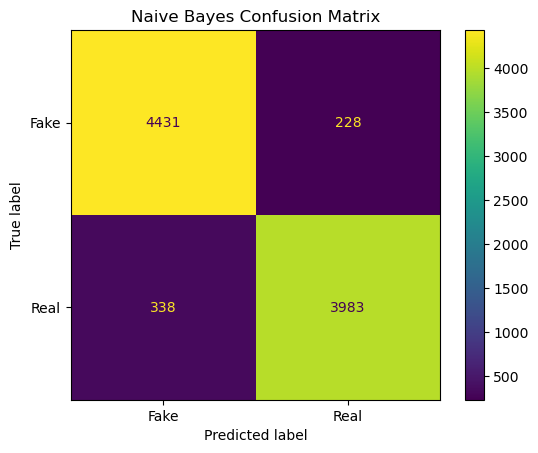

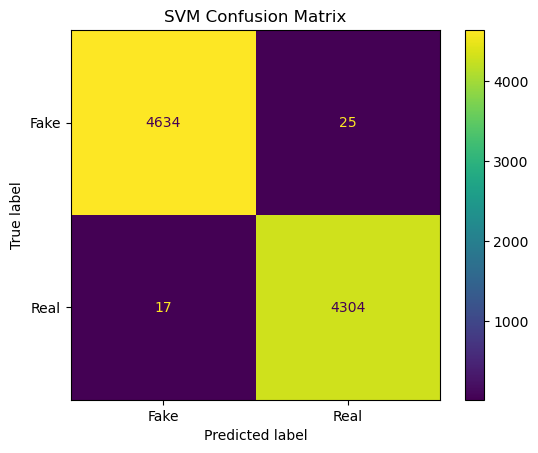

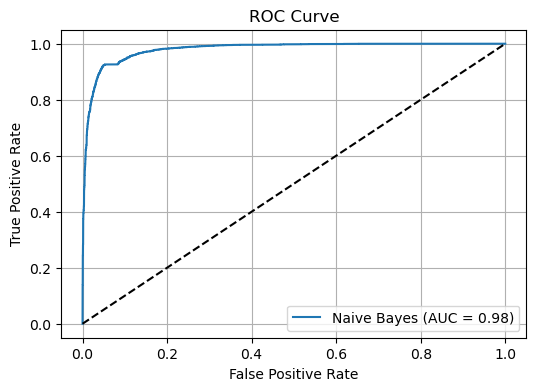

In [14]:

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=['Fake', 'Real']).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=['Fake', 'Real']).plot()
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


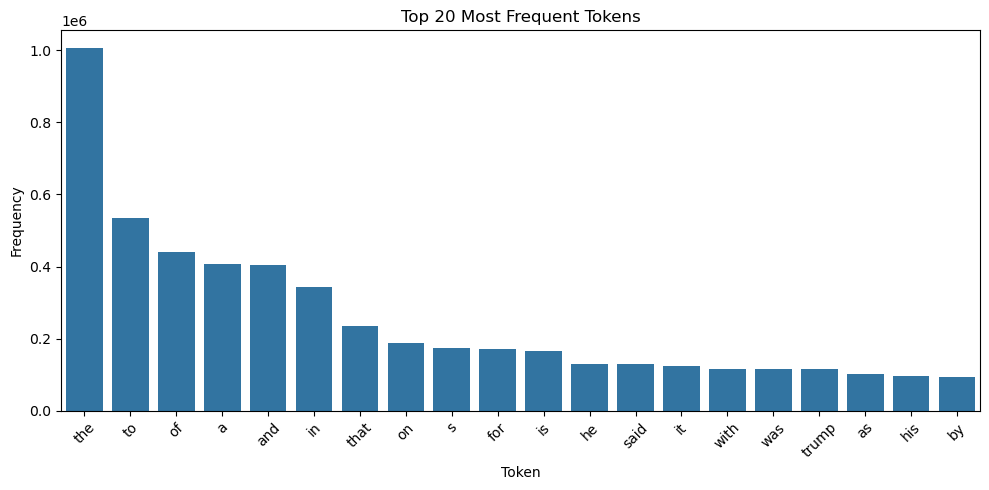

In [15]:

# Token Frequency Plot 
from collections import Counter
import seaborn as sns

tokenized_texts = [tokenizer(text) for text in df['text']]
all_tokens = [token for tokens in tokenized_texts for token in tokens]

token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(20)
tokens, freqs = zip(*top_tokens)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(tokens), y=list(freqs))
plt.title("Top 20 Most Frequent Tokens")
plt.xticks(rotation=45)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


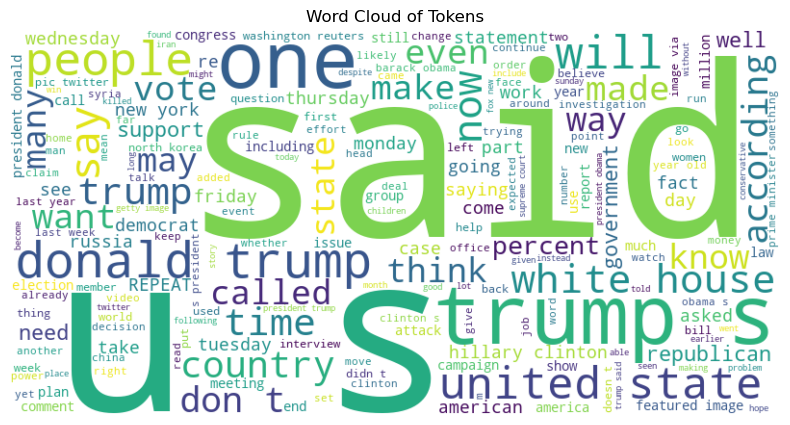

In [17]:

from wordcloud import WordCloud

text_blob = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tokens")
plt.show()
